In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
import sqlite3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv("PBL5recommendationdata.csv", encoding = 'latin-1')

In [3]:
## EDA

In [4]:
data.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [5]:
data.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
data.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
data.notnull().sum()

Customers.id             4194
Customers.fname          4194
Customers.lname          4194
Customers.company         727
Customers.create_date    4194
                         ... 
Products.leg_style          0
Products.seat_size        162
Products.family_id       3869
Products.saved_status    3930
Products.freight_cost       0
Length: 181, dtype: int64

In [9]:
df_total = pd.DataFrame(data.isnull().sum())
df_total

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [10]:
eksik_veriler = df_total[df_total[0]>1000] 
eksik_veriler

,0
Customers.company,3467
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
...,...
Products.material,3392
Products.arm_style,4039
Products.leg_style,4194
Products.seat_size,4032


In [11]:
for i in eksik_veriler.index:
    data.drop(i, axis = 1, inplace = True)

In [12]:
data.isnull().sum()

Customers.id                       0
Customers.fname                    0
Customers.lname                    0
Customers.create_date              0
Customers.last_modified            0
Customers.customer_type          423
Orders.id                          0
Orders.customer_id                 0
Orders.fname                       0
Orders.lname                       0
Orders.order_number                0
Orders.currency                    0
Orders.subtotal                    0
Orders.tax                       457
Orders.shipping                  195
Orders.total                       0
Orders.shipping_carrier          617
Orders.shipping_method           443
Orders.tracking                  376
Orders.payment_status              5
Orders.payment_date               18
Orders.payment_type              384
Orders.payment_amount             18
Orders.payment_id                430
Orders.payment_code              748
Orders.status                      0
Orders.placed_date                 0
O

In [13]:
for i in data.select_dtypes(include = np.number):
    data[i].fillna(data[i].mean(), inplace = True)

In [14]:
from statistics import mode
for i in data.select_dtypes(include = np.object):
    data[i].fillna(mode(data[i]), inplace = True)

In [15]:
for i in data.select_dtypes(include=np.object):
    data[i].fillna(data[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [16]:
data.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [17]:
Customers_columns = [column for column in data.columns if 'customers' in column.lower()]
Products_columns = [column for column in data.columns if 'products' in column.lower()]
Order_columns = [column for column in data.columns if 'orders' in column.lower()]

In [18]:
Customers = data[Customers_columns]
Products = data[Products_columns]
Orders = data[Order_columns]

In [19]:
Customers.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [20]:
Products.head()

,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,online:en:US:1842,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,8000065E-1434298780,1.450323e+09,<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,A9270,10.60,7.80,18.50,PF04970,0.876336
4,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,ROSCOE MEDICAL INC,MDS86710,62.0,health-care-products,online:en:US:1842,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,80008B12-1438900627,1.450323e+09,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,E0730,8.50,2.75,12.00,PF03045,0.876336


In [21]:
Orders.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type
0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0
1,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0
2,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.0
3,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.0
4,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.95,46.00,fedex,11|Ground,6.87398E+14,3.0,1.386862e+09,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,0.0


## Insert the three data frames in a SQLite database

In [22]:
connection = sqlite3.connect('databese.db')

In [23]:
customer_table = 'Customers'
products_table = 'Products'
orders_table = 'Orders'

Customers.to_sql(customer_table, connection, if_exists='replace', index=False)
Products.to_sql(products_table, connection, if_exists='replace', index=False)
Orders.to_sql(orders_table, connection, if_exists='replace', index=False)

4194

In [24]:
connection.close()

In [25]:
con = sqlite3.connect('databese.db')
query = "SELECT * FROM Customers"
df1 = pd.read_sql_query(query, con)

In [26]:
df1.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [27]:
query1 = "SELECT * FROM Orders"
df2 = pd.read_sql_query(query1, con)

In [28]:
df2.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type
0,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0
1,23,3,John,Smith,23,USD,20.00,0.800838,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0
2,9531,3,John,Smith,9531,USD,68.78,0.000000,9.95,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.0
3,29,4,James,Anderson,29,USD,19.56,0.000000,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.0
4,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.95,46.00,fedex,11|Ground,6.87398E+14,3.0,1.386862e+09,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,0.0


In [29]:
query2 = "SELECT * FROM Products"
df3 = pd.read_sql_query(query2, con)

In [30]:
df3.head()

,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000
1,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336
2,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000
3,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,online:en:US:1842,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,8000065E-1434298780,1.450323e+09,<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,A9270,10.60,7.80,18.50,PF04970,0.876336
4,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,ROSCOE MEDICAL INC,MDS86710,62.0,health-care-products,online:en:US:1842,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,80008B12-1438900627,1.450323e+09,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,E0730,8.50,2.75,12.00,PF03045,0.876336


In [31]:
merged_df = pd.merge(df1, df2,left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df2, left_index=True, right_index=True)

In [32]:
merged_df

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id_x,Orders.customer_id_x,Orders.fname_x,Orders.lname_x,Orders.order_number_x,Orders.currency_x,Orders.subtotal_x,Orders.tax_x,Orders.shipping_x,Orders.total_x,Orders.shipping_carrier_x,Orders.shipping_method_x,Orders.tracking_x,Orders.payment_status_x,Orders.payment_date_x,Orders.payment_type_x,Orders.payment_amount_x,Orders.payment_id_x,Orders.payment_code_x,Orders.status_x,Orders.placed_date_x,Orders.updated_date_x,Orders.shipped_date_x,Orders.customer_type_x,Orders.id_y,Orders.customer_id_y,Orders.fname_y,Orders.lname_y,Orders.order_number_y,Orders.currency_y,Orders.subtotal_y,Orders.tax_y,Orders.shipping_y,Orders.total_y,Orders.shipping_carrier_y,Orders.shipping_method_y,Orders.tracking_y,Orders.payment_status_y,Orders.payment_date_y,Orders.payment_type_y,Orders.payment_amount_y,Orders.payment_id_y,Orders.payment_code_y,Orders.status_y,Orders.placed_date_y,Orders.updated_date_y,Orders.shipped_date_y,Orders.customer_type_y
0,797,Christy,Dill,1426018724,1437764306,0.000000,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.950000,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.000000,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.950000,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.000000
1,3,John,Smith,1386089139,1437764354,0.000000,23,3,John,Smith,23,USD,20.00,0.800838,9.990000,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.000000,23,3,John,Smith,23,USD,20.00,0.800838,9.990000,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.000000
2,3,John,Smith,1386089139,1437764354,0.000000,9531,3,John,Smith,9531,USD,68.78,0.000000,9.950000,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.000000,9531,3,John,Smith,9531,USD,68.78,0.000000,9.950000,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.000000
3,4,James,Anderson,1386780263,1437762646,0.000000,29,4,James,Anderson,29,USD,19.56,0.000000,9.950000,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.000000,29,4,James,Anderson,29,USD,19.56,0.000000,9.950000,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.000000
4,5,Abraham,Pollak,1386861599,1437764316,0.000000,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.950000,46.00,fedex,11|Ground,6.87398E+14,3.0,1.386862e+09,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,0.000000,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.950000,46.00,fedex,11|Ground,6.87398E+14,3.0,1.386862e+09,authorize.net,46.00,0,02708Z,1,1386861599,1.440529e+09,1.386876e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1463408698,0.000000,17421,3730,Nora,Fontana,17421,USD,14.85,1.210000,0.000000,16.06,fedex,11|Ground,7.96468E+14,3.0,1.463409e+09,paypal,16.06,16706988SV3261147,02708Z,0,1463408854,1.449607e+09,1.442167e+09,0.000000,17421,3730,Nora,Fontana,17421,USD,14.85,1.210000,0.000000,16.06,fedex,11|Ground,7.96468E+14,3.0,1.463409e+09,paypal,16.06,16706988SV3261147,02708Z,0,1463408854,1.449607e+09,1.442167e+09,0.000000
4190,3732,Kennithe,Tecora,1463412756,1463412756,0.137364,17425,3732,Kennithe,Tecora,17425,USD,39.99,0.000000,7.141263,39.99,fedex,11|Ground,7.96468E+14,1.0,1.463413e+09,authorize.net,39.99,8411514882,159938,0,1463412757,1.

In [33]:
merged_df.isnull().sum()

Customers.id                 0
Customers.fname              0
Customers.lname              0
Customers.create_date        0
Customers.last_modified      0
Customers.customer_type      0
Orders.id_x                  0
Orders.customer_id_x         0
Orders.fname_x               0
Orders.lname_x               0
Orders.order_number_x        0
Orders.currency_x            0
Orders.subtotal_x            0
Orders.tax_x                 0
Orders.shipping_x            0
Orders.total_x               0
Orders.shipping_carrier_x    0
Orders.shipping_method_x     0
Orders.tracking_x            0
Orders.payment_status_x      0
Orders.payment_date_x        0
Orders.payment_type_x        0
Orders.payment_amount_x      0
Orders.payment_id_x          0
Orders.payment_code_x        0
Orders.status_x              0
Orders.placed_date_x         0
Orders.updated_date_x        0
Orders.shipped_date_x        0
Orders.customer_type_x       0
Orders.id_y                  0
Orders.customer_id_y         0
Orders.f

In [34]:
silinecek_column = [column for column in merged_df.columns if 'name' in column.lower()]
silinecek_column

['Customers.fname',
 'Customers.lname',
 'Orders.fname_x',
 'Orders.lname_x',
 'Orders.fname_y',
 'Orders.lname_y']

In [35]:
silinecek_column2 = [column for column in merged_df.columns if 'id' in column.lower()]
silinecek_column2

['Customers.id',
 'Orders.id_x',
 'Orders.customer_id_x',
 'Orders.payment_id_x',
 'Orders.id_y',
 'Orders.customer_id_y',
 'Orders.payment_id_y']

In [36]:
silinecek_column3 = [column for column in merged_df.columns if 'date' in column.lower()]
silinecek_column4 = [column for column in merged_df.columns if 'code' in column.lower()]

In [37]:
merged_df = merged_df.drop(silinecek_column, axis = 1)

In [38]:
merged_df = merged_df.drop(silinecek_column2, axis = 1)

In [39]:
merged_df = merged_df.drop(silinecek_column3, axis = 1)
merged_df = merged_df.drop(silinecek_column4, axis = 1)

In [40]:
#merged_df = merged_df.drop(["Orders.payment_code_x", "Customers.create_date", "Customers.last_modified"], axis = 1)
merged_df

,Customers.last_modified,Customers.customer_type,Orders.order_number_x,Orders.currency_x,Orders.subtotal_x,Orders.tax_x,Orders.shipping_x,Orders.total_x,Orders.shipping_carrier_x,Orders.shipping_method_x,Orders.tracking_x,Orders.payment_status_x,Orders.payment_type_x,Orders.payment_amount_x,Orders.status_x,Orders.customer_type_x,Orders.order_number_y,Orders.currency_y,Orders.subtotal_y,Orders.tax_y,Orders.shipping_y,Orders.total_y,Orders.shipping_carrier_y,Orders.shipping_method_y,Orders.tracking_y,Orders.payment_status_y,Orders.payment_type_y,Orders.payment_amount_y,Orders.status_y,Orders.customer_type_y
0,1437764306,0.000000,3758,USD,57.20,0.000000,9.950000,64.29,fedex,11|Ground,5.7204E+14,3.0,authorize.net,64.29,1,0.000000,3758,USD,57.20,0.000000,9.950000,64.29,fedex,11|Ground,5.7204E+14,3.0,authorize.net,64.29,1,0.000000
1,1437764354,0.000000,23,USD,20.00,0.800838,9.990000,29.99,fedex,11|Ground,1.28597E+14,3.0,authorize.net,29.99,1,0.000000,23,USD,20.00,0.800838,9.990000,29.99,fedex,11|Ground,1.28597E+14,3.0,authorize.net,29.99,1,0.000000
2,1437764354,0.000000,9531,USD,68.78,0.000000,9.950000,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,authorize.net,78.73,3,0.000000,9531,USD,68.78,0.000000,9.950000,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,authorize.net,78.73,3,0.000000
3,1437762646,0.000000,29,USD,19.56,0.000000,9.950000,29.55,fedex,11|Ground,7.96468E+14,3.0,authorize.net,29.55,1,0.000000,29,USD,19.56,0.000000,9.950000,29.55,fedex,11|Ground,7.96468E+14,3.0,authorize.net,29.55,1,0.000000
4,1437764316,0.000000,30,USD,36.05,0.800838,9.950000,46.00,fedex,11|Ground,6.87398E+14,3.0,authorize.net,46.00,1,0.000000,30,USD,36.05,0.800838,9.950000,46.00,fedex,11|Ground,6.87398E+14,3.0,authorize.net,46.00,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,0.000000,17421,USD,14.85,1.210000,0.000000,16.06,fedex,11|Ground,7.96468E+14,3.0,paypal,16.06,0,0.000000,17421,USD,14.85,1.210000,0.000000,16.06,fedex,11|Ground,7.96468E+14,3.0,paypal,16.06,0,0.000000
4190,1463412756,0.137364,17425,USD,39.99,0.000000,7.141263,39.99,fedex,11|Ground,7.96468E+14,1.0,authorize.net,39.99,0,0.124159,17425,USD,39.99,0.000000,7.141263,39.99,fedex,11|Ground,7.96468E+14,1.0,authorize.net,39.99,0,0.124159
4191,1463413245,0.137364,17426,USD,1099.00,0.000000,7.141263,989.10,fedex,11|Ground,7.96468E+14,1.0,authorize.net,989.10,5,0.000000,17426,USD,1099.00,0.000000,7.141263,989.10,fedex,11|Ground,7.96468E+14,1.0,authorize.net,989.10,5,0.000000
4192,1463416687,0.137364,17431,USD,129.99,0.000000,0.000000,129.99,fedex,11|Ground,7.96468E+14,3.0,paypal,129.99,0,0.124159,17431,USD,129.99,0.000000,0.000000,129.99,fedex,11|Ground,7.96468E+14,3.0,paypal,129.99,0,0.124159


In [41]:
merged_df.info()  ## Orders.currency_x, Orders.shipping_carrier_x, Orders.shipping_method_x, Orders.payment_type_x, Orders.currency_y
# Orders.shipping_carrier_y, Orders.shipping_method_y, Orders.payment_type_y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customers.last_modified    4194 non-null   int64  
 1   Customers.customer_type    4194 non-null   float64
 2   Orders.order_number_x      4194 non-null   object 
 3   Orders.currency_x          4194 non-null   object 
 4   Orders.subtotal_x          4194 non-null   float64
 5   Orders.tax_x               4194 non-null   float64
 6   Orders.shipping_x          4194 non-null   float64
 7   Orders.total_x             4194 non-null   float64
 8   Orders.shipping_carrier_x  4194 non-null   object 
 9   Orders.shipping_method_x   4194 non-null   object 
 10  Orders.tracking_x          4194 non-null   object 
 11  Orders.payment_status_x    4194 non-null   float64
 12  Orders.payment_type_x      4194 non-null   object 
 13  Orders.payment_amount_x    4194 non-null   float

In [42]:
merged_df = merged_df.drop(['Orders.order_number_x', 'Orders.tracking_x', 'Orders.tracking_y'], axis = 1)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customers.last_modified    4194 non-null   int64  
 1   Customers.customer_type    4194 non-null   float64
 2   Orders.currency_x          4194 non-null   object 
 3   Orders.subtotal_x          4194 non-null   float64
 4   Orders.tax_x               4194 non-null   float64
 5   Orders.shipping_x          4194 non-null   float64
 6   Orders.total_x             4194 non-null   float64
 7   Orders.shipping_carrier_x  4194 non-null   object 
 8   Orders.shipping_method_x   4194 non-null   object 
 9   Orders.payment_status_x    4194 non-null   float64
 10  Orders.payment_type_x      4194 non-null   object 
 11  Orders.payment_amount_x    4194 non-null   float64
 12  Orders.status_x            4194 non-null   int64  
 13  Orders.customer_type_x     4194 non-null   float

In [44]:
merged_df.sample(10)

,Customers.last_modified,Customers.customer_type,Orders.currency_x,Orders.subtotal_x,Orders.tax_x,Orders.shipping_x,Orders.total_x,Orders.shipping_carrier_x,Orders.shipping_method_x,Orders.payment_status_x,Orders.payment_type_x,Orders.payment_amount_x,Orders.status_x,Orders.customer_type_x,Orders.order_number_y,Orders.currency_y,Orders.subtotal_y,Orders.tax_y,Orders.shipping_y,Orders.total_y,Orders.shipping_carrier_y,Orders.shipping_method_y,Orders.payment_status_y,Orders.payment_type_y,Orders.payment_amount_y,Orders.status_y,Orders.customer_type_y
3546,1459875104,0.137364,USD,26.06,0.000000,9.950000,36.01,fedex,11|Ground,3.0,authorize.net,36.01,1,0.124159,15172,USD,26.06,0.000000,9.950000,36.01,fedex,11|Ground,3.0,authorize.net,36.01,1,0.124159
3939,1462235318,0.000000,USD,106.37,0.000000,9.950000,116.32,manual,0|Standard Shipping,3.0,authorize.net,116.32,1,0.000000,16429,USD,106.37,0.000000,9.950000,116.32,manual,0|Standard Shipping,3.0,authorize.net,116.32,1,0.000000
664,1437763293,0.000000,USD,343.75,0.000000,0.000000,343.75,manual,0|Free Shipping,3.0,authorize.net,343.75,1,0.000000,3142,USD,343.75,0.000000,0.000000,343.75,manual,0|Free Shipping,3.0,authorize.net,343.75,1,0.000000
1670,1456953263,0.000000,USD,74.99,0.000000,9.950000,84.94,fedex,11|Ground,3.0,authorize.net,84.94,1,0.000000,5322,USD,74.99,0.000000,9.950000,84.94,fedex,11|Ground,3.0,authorize.net,84.94,1,0.000000
3233,1457485504,1.000000,USD,570.11,0.000000,9.950000,523.05,manual,0|Standard Shipping,3.0,authorize.net,523.05,1,1.000000,13973,USD,570.11,0.000000,9.950000,523.05,manual,0|Standard Shipping,3.0,authorize.net,523.05,1,1.000000
3032,1456953281,0.000000,USD,121.43,0.000000,9.950000,119.24,fedex,11|Ground,3.0,authorize.net,119.24,1,0.000000,13111,USD,121.43,0.000000,9.950000,119.24,fedex,11|Ground,3.0,authorize.net,119.24,1,0.000000
260,1437763530,0.000000,USD,34.99,0.800838,9.950000,44.94,fedex,11|Ground,3.0,paypal,44.94,1,0.000000,1155,USD,34.99,0.800838,9.950000,44.94,fedex,11|Ground,3.0,paypal,44.94,1,0.000000
3069,1456955252,0.000000,USD,16.23,0.000000,6.450000,16.23,fedex,11|Ground,3.0,authorize.net,16.23,1,0.000000,13248,USD,16.23,0.000000,6.450000,16.23,fedex,11|Ground,3.0,authorize.net,16.23,1,0.000000
2177,1456954594,0.000000,USD,263.75,0.000000,9.950000,273.70,manual,0|Standard Shipping,3.0,authorize.net,273.70,1,0.000000,8589,USD,263.75,0.000000,9.950000,273.70,manual,0|Standard Shipping,3.0,authorize.net,273.70,1,0.000000
167,1437763373,0.000000,USD,88.67,0.000000,7.141263,86.99,ups,-1|Free Shipping,3.0,authorize.net,86.99,12,0.000000,674,USD,88.67,0.000000,7.141263,86.99,ups,-1|Free Shipping,3.0,authorize.net,86.99,12,0.000000


In [45]:
merged_df = merged_df.drop("Orders.order_number_y", axis = 1)

In [46]:
merged_df = pd.get_dummies(merged_df, drop_first = True)
merged_df

,Customers.last_modified,Customers.customer_type,Orders.subtotal_x,Orders.tax_x,Orders.shipping_x,Orders.total_x,Orders.payment_status_x,Orders.payment_amount_x,Orders.status_x,Orders.customer_type_x,Orders.subtotal_y,Orders.tax_y,Orders.shipping_y,Orders.total_y,Orders.payment_status_y,Orders.payment_amount_y,Orders.status_y,Orders.customer_type_y,Orders.shipping_carrier_x_HWEP,Orders.shipping_carrier_x_INTF,Orders.shipping_carrier_x_MT03,Orders.shipping_carrier_x_NDSN,Orders.shipping_carrier_x_NSVA,Orders.shipping_carrier_x_RDWY,Orders.shipping_carrier_x_WTVA,Orders.shipping_carrier_x_fedex,Orders.shipping_carrier_x_manual,Orders.shipping_carrier_x_ups,Orders.shipping_method_x_0|Free Shipping,Orders.shipping_method_x_0|Standard Shipping,Orders.shipping_method_x_11|Ground,Orders.shipping_method_x_FEDERAL EXPRESS CORP.,"Orders.shipping_method_x_HOWARD'S EXPRESS, INC.",Orders.shipping_method_x_INTERNATIONAL FEDEX,Orders.shipping_method_x_LAND AIR OF NEW ENGLAND,Orders.shipping_method_x_MEDTRANS,Orders.shipping_method_x_NATIONAL DELIVERY,Orders.shipping_method_x_NATIONAL DELIVERY SYSTEMS,Orders.shipping_method_x_ROADWAY EXPRESS,Orders.shipping_method_x_SOUTHWESTERN MOTOR TRNAS,Orders.shipping_method_x_WILSON TRUCKING CORP,Orders.payment_type_x_Check,Orders.payment_type_x_Credit Card,Orders.payment_type_x_authorize.net,Orders.payment_type_x_paypal,Orders.shipping_carrier_y_HWEP,Orders.shipping_carrier_y_INTF,Orders.shipping_carrier_y_MT03,Orders.shipping_carrier_y_NDSN,Orders.shipping_carrier_y_NSVA,Orders.shipping_carrier_y_RDWY,Orders.shipping_carrier_y_WTVA,Orders.shipping_carrier_y_fedex,Orders.shipping_carrier_y_manual,Orders.shipping_carrier_y_ups,Orders.shipping_method_y_0|Free Shipping,Orders.shipping_method_y_0|Standard Shipping,Orders.shipping_method_y_11|Ground,Orders.shipping_method_y_FEDERAL EXPRESS CORP.,"Orders.shipping_method_y_HOWARD'S EXPRESS, INC.",Orders.shipping_method_y_INTERNATIONAL FEDEX,Orders.shipping_method_y_LAND AIR OF NEW ENGLAND,Orders.shipping_method_y_MEDTRANS,Orders.shipping_method_y_NATIONAL DELIVERY,Orders.shipping_method_y_NATIONAL DELIVERY SYSTEMS,Orders.shipping_method_y_ROADWAY EXPRESS,Orders.shipping_method_y_SOUTHWESTERN MOTOR TRNAS,Orders.shipping_method_y_WILSON TRUCKING CORP,Orders.payment_type_y_Check,Orders.payment_type_y_Credit Card,Orders.payment_type_y_authorize.net,Orders.payment_type_y_paypal
0,1437764306,0.000000,57.20,0.000000,9.950000,64.29,3.0,64.29,1,0.000000,57.20,0.000000,9.950000,64.29,3.0,64.29,1,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1437764354,0.000000,20.00,0.800838,9.990000,29.99,3.0,29.99,1,0.000000,20.00,0.800838,9.990000,29.99,3.0,29.99,1,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1437764354,0.000000,68.78,0.000000,9.950000,78.73,3.0,78.73,3,0.000000,68.78,0.000000,9.950000,78.73,3.0,78.73,3,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1437762646,0.000000,19.56,0.000000,9.950000,29.55,3.0,29.55,1,0.000000,19.56,0.000000,9.950000,29.55,3.0,29.55,1,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1437764316,0.000000,36.05,0.800838,9.950000,46.00,3.0,46.00,1,0.000000,36.05,0.800838,9.950000,46.00,3.0,46.00,1,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1463408698,0.000000,14.85,1.210000,0.000000,16.06,3.0,16.06,0,0.000000,14.85,1.210000,0.000000,16.06,3.0,16.06,0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,

### PCA

In [47]:
pca = PCA(2)
x = pca.fit_transform(merged_df)

In [48]:
pca.explained_variance_ratio_

array([9.99999997e-01, 2.80463976e-09])

In [49]:
sum(pca.explained_variance_ratio_)

0.999999999956923

## KNN Clustering;

In [50]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
model = kmeans.fit(x)
tahmin = model.predict(x)

In [51]:
tahmin

array([1, 1, 1, ..., 2, 2, 2])

In [52]:
silhouette_score(x, tahmin)

0.8921146187376932

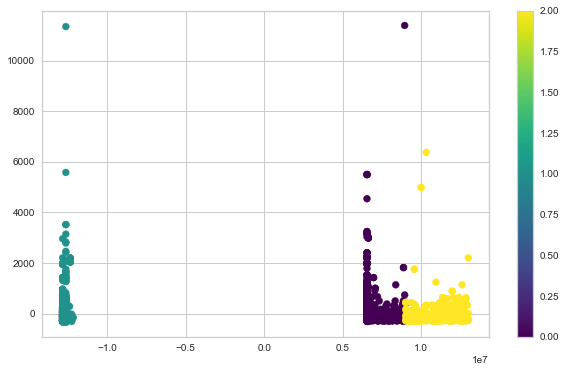

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=tahmin, cmap='viridis')
plt.colorbar()
plt.grid(True)   
plt.show()

In [54]:
allscore = []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)

In [55]:
clust(10)

Cluster  2  score  0.9388122032259814
Cluster  3  score  0.8921146187376932
Cluster  4  score  0.8916702820428241
Cluster  5  score  0.8856129383107232
Cluster  6  score  0.8821595420036994
Cluster  7  score  0.881284380249369
Cluster  8  score  0.8833712449967349
Cluster  9  score  0.8838714762373767
Cluster  10  score  0.890775729533178
Cluster  11  score  0.8774286128186846


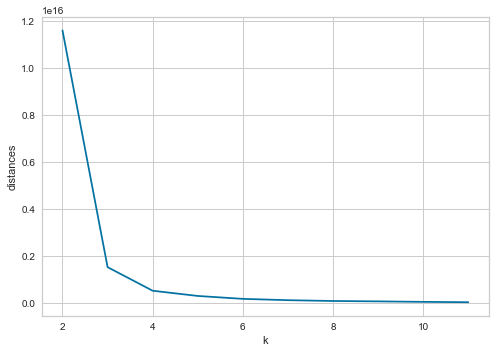

In [56]:
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters, distances);

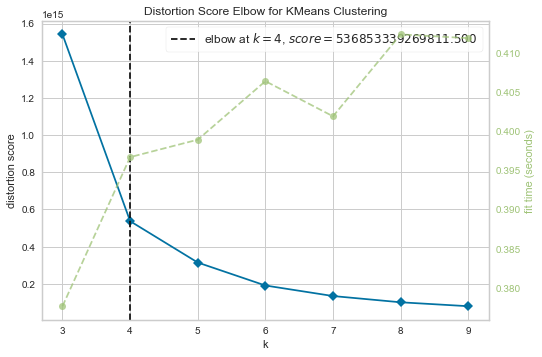

In [57]:
visualizer = KElbowVisualizer(kmeans, k=(3,10))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show(); # Finalize and render the figure

In [58]:
kmeans2 = KMeans(n_clusters = 4, random_state = 0)
model2 = kmeans2.fit(x)
tahmin2 = model2.predict(x)

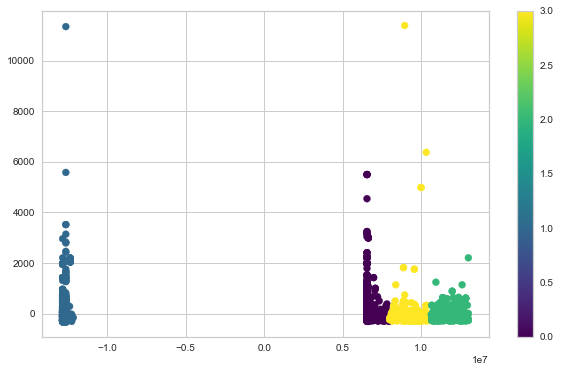

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=tahmin2, cmap='viridis')
plt.colorbar()
plt.grid(True)   
plt.show()